In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC

**Importing the dataset**

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
print(data.shape)
data.info()

(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.drop("User ID", axis = 1, inplace = True)

In [6]:
print(data.describe())

              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000


In [7]:
data_df = pd.get_dummies(data, columns = ['Gender'], drop_first=True)
data_df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


**Splitting the dataset into the Training set and Test set**

In [8]:
X = data_df.drop("Purchased", axis = 1)
y = data_df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train

,Age,EstimatedSalary,Gender_Male
110,39,71000,0
230,35,147000,0
135,23,63000,1
368,38,71000,1
364,42,104000,1
...,...,...,...
231,39,42000,1
6,27,84000,0
247,57,122000,0
137,30,107000,1


**Feature Scaling**

In [9]:
col=X.columns
print(col)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = col)
X_test = pd.DataFrame(X_test, columns = col)
print(X_train)

Index(['Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')
          Age  EstimatedSalary  Gender_Male
0    0.500000         0.417910          0.0
1    0.404762         0.985075          0.0
2    0.119048         0.358209          1.0
3    0.476190         0.417910          1.0
4    0.571429         0.664179          1.0
..        ...              ...          ...
275  0.500000         0.201493          1.0
276  0.214286         0.514925          0.0
277  0.928571         0.798507          0.0
278  0.285714         0.686567          1.0
279  0.523810         0.335821          0.0

[280 rows x 3 columns]


**Fitting SVM to the Training set**

In [10]:
clf = SVC();
clf.fit(X_train,y_train)


SVC()

**Predicting the Test set results**

In [11]:
y_pred=clf.predict(X_test)

**Making the Confusion Matrix**

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Confusion Matix")
print(cm)

Accuracy: 0.8833333333333333
Precision: 0.8461538461538461
Recall: 0.88
Confusion Matix
[[62  8]
 [ 6 44]]


**Visualising the Training set results**

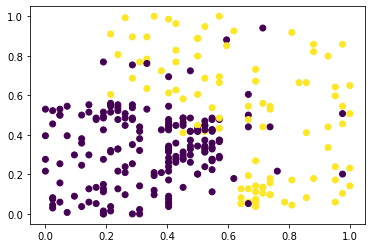

In [15]:
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c = y_train)

**Visualising the Test set results**

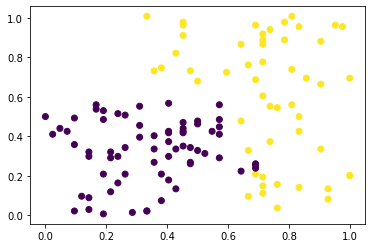

In [16]:
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1],c = y_pred)